In [66]:
corpus = '/Users/llwu/E盘/KKB/NLP/article_9k.txt'

In [67]:
FILE = open(corpus).read()

In [68]:
FILE[:100]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MI'

In [69]:
def generate_by_pro(text_corpus,length=20):
    return "".join(random.sample(text_corpus,length))

In [70]:
import random

In [71]:
generate_by_pro(FILE)

'批意马n证1举担周西科多省社成路动不近当'

In [72]:
import jieba

In [73]:
max_length = 1000000
sub_file = FILE[:max_length]

In [74]:
list(jieba.cut("我爱我的祖国哈"))

['我', '爱', '我', '的', '祖国', '哈']

In [75]:
def cut(string):
    return list(jieba.cut(string))

In [76]:
TOKENS = cut(sub_file)

In [77]:
len(TOKENS)

532454

In [78]:
from collections import Counter

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

In [80]:
words_count = Counter(TOKENS)

In [81]:
words_with_fre = [f for w,f in words_count.most_common()]

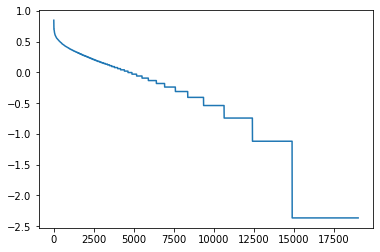

In [82]:
import numpy as np
plt.plot(np.log(np.log(np.log(words_with_fre))))

# 在大量的文本中，出现次数第二多的单词是第一多的频率的1/2，第三多的单词出现的频率是第一多频率的1/3，。。。第1000多单词出现的频率是第一多的1/1000，所以关注少量单词

In [83]:
_2_gram_words = [TOKENS[i]+TOKENS[i+1] for i in range(len(TOKENS)-1)]
_2_gram_word_counts = Counter(_2_gram_words)
_2_gram_word_counts 

Counter({'此外自': 1,
         '自本周': 1,
         '本周6': 1,
         '6月': 1173,
         '月12': 58,
         '12日起': 1,
         '日起除': 1,
         '除小米': 1,
         '小米手机': 3,
         '手机6': 1,
         '6等': 1,
         '等15': 5,
         '15款': 1,
         '款机型': 1,
         '机型外': 1,
         '外其余': 2,
         '其余机型': 1,
         '机型已': 1,
         '已暂停': 1,
         '暂停更新': 1,
         '更新发布': 1,
         '发布含': 1,
         '含开发': 1,
         '开发版': 1,
         '版体验版': 1,
         '体验版内测': 1,
         '内测稳定版': 1,
         '稳定版暂不受': 1,
         '暂不受影响': 1,
         '影响以': 3,
         '以确保': 5,
         '确保工程师': 1,
         '工程师可以': 1,
         '可以集中': 1,
         '集中全部': 1,
         '全部精力': 1,
         '精力进行': 1,
         '进行系统优化': 1,
         '系统优化工作': 1,
         '工作有人': 1,
         '有人猜测': 1,
         '猜测这': 1,
         '这也': 86,
         '也是': 298,
         '是将': 8,
         '将精力': 1,
         '精力主要': 1,
         '主要用到': 1,
         '用到MIUI9': 1,
         'MIUI9的': 2,
        

In [84]:
def get_1_gram_count(word):
    if word in words_count:
        return words_count[word]
    else:
        return words_count.most_common()[-1][-1]
def get_2_gram_count(word):
    if word in _2_gram_word_counts:
        return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]
    
def get_gram_count(word,wc):
    if word in wc:
        return wc[word]
    else:
        return wc.most_common()[-1][-1]
def two_gram_model(sentence):
    tokens = cut(sentence)
    probility = 1
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        pro = get_gram_count(word+next_word,_2_gram_word_counts)/get_gram_count(next_word,words_count)
        probility *= pro
    return probility

        

In [85]:
two_gram_model("前天早上吃晚饭的时候")

7.429922323539344e-07

In [86]:
two_gram_model("前天早上吃早饭的时候")

4.64370145221209e-09

In [87]:
two_gram_model("我请你吃火锅")

3.0458089668615984e-06

In [88]:
two_gram_model("这个人来自清华大学")

2.102784086130036e-06

In [89]:
two_gram_model("这个花特别好看")

1.7475796022508822e-05

In [90]:
two_gram_model("花这特别好看")

4.467496727558647e-07